# Oil Well Performance from flow test data
Given a set of data and parameters of an oil well, we want to compute the optimal Choke diameter for having the maximum production.

We know:

In [113]:
P_s = 5000 #psig 
PI = 1.5 #bopd/psig, assumed constant 
GOR = 2000 #scf/bbl
Maximum_drawdown = 0.25



The pressure drops in tubing and the pipeline are given as a table. We pass them in a Pandas Dataframe

In [114]:
import pandas as pd
Pwh_indexes=[400,1000,1600] #psig
Qo_indexes=[1000,2000,3000] #bopd
indexes=[]
for i in Pwh_indexes:
    for j in Qo_indexes:
        indexes.append((i,j))
index=pd.MultiIndex.from_tuples(indexes, names=['Pwh','Qo'])
Pwf_values=[2570,3012,3528,3196,3641,4160,3814,4263,4784]
Pwf=pd.DataFrame(Pwf_values,index=index,columns=["Pwf"])
Pwh=pd.DataFrame(Pwh_indexes,index=Qo_indexes,columns=["Pwh"])
Pwf


Pwf
Pwh  Qo        
400  1000  2570
     2000  3012
     3000  3528
1000 1000  3196
     2000  3641
     3000  4160
1600 1000  3814
     2000  4263
     3000  4784

The Pline is given by:

In [115]:
Qo_indexes_2=[0]+Qo_indexes #bopd
P_line_values=[280,300,400,700] #psig
P_line=pd.DataFrame(Pline_values,index=Qo_indexes_2,columns=["Pline"])

IPR is a straight line: $$P_{wf}=P_{s}-\frac{Q_o}{PI}$$

Hence the maximum producible $Q_o$ is give by: $$Q_o=PI\left(P_s - P_{wf}\right)$$

In [116]:
Qo_max=PI*(P_s-Maximum_drawdown*P_s)

We can plot both Pwh given some points from simulations tools, pline vs Qo and PWf vs Qo. From the Well performance graph we find the operational points.

Text(0, 0.5, 'P, psig')

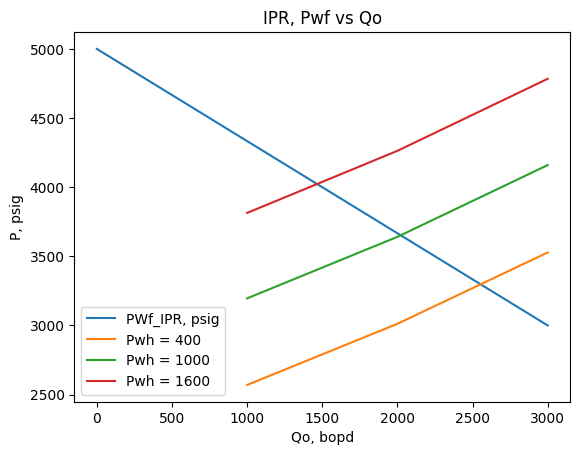

In [117]:
# Pwf vs Qo, IPR vs Qo -> well performance grah
graph_2=plt.figure()
Pwf_2_values=[P_s- x / PI for x in Qo_indexes_2]
Pwf_2=pd.DataFrame(Pwf_2_values,index=Qo_indexes_2,columns=["Pwf_2"])
plt.plot(Pwf_2['Pwf_2'], label='PWf_IPR, psig')
Pwf_unstack=Pwf.unstack(level=0)
for column in Pwf_unstack.columns:
    plt.plot(Pwf_unstack[column],label="Pwh = " + str(column[1]))
plt.title('IPR, Pwf vs Qo')
plt.legend()
plt.xlabel('Qo, bopd')
plt.ylabel('P, psig')


Text(0, 0.5, 'P, psig')

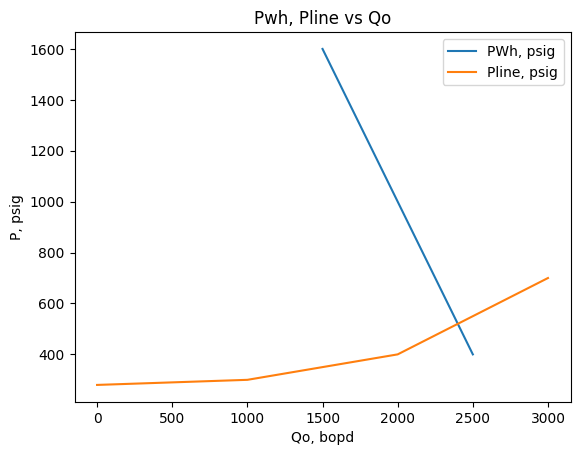

In [118]:
import matplotlib.pyplot as plt 
# Pwh vs Qo + Pline vs Qo
op=[(1500,1600),(2000,1000),(2500,400)]
df_op=pd.DataFrame(op, columns=['Qo','Pwh'])
graph_1=plt.figure()
plt.plot(df_op['Qo'],df_op['Pwh'], label='PWh, psig')
plt.plot(P_line['Pline'], label="Pline, psig")
plt.title('Pwh, Pline vs Qo')
plt.legend()
plt.xlabel('Qo, bopd')
plt.ylabel('P, psig')

So from grph_1, at Q_o = 1800 bopd, we have Pwh = 1230 psig and Pline = 360 psig -> flow through the choke is Critical -> Gilbert equation $$D_{choke}=\left(10,01 * \frac{Q_{oil}*GOR^{0,546}}{P_{wh}}\right)^{(1/1,89)}$$

In [120]:
D_choke=pow((10.01*(Qo_max*pow(GOR,0.546))/(1200)),(1/1.89)) #in
print(D_choke)


68.8583281462413


The Diameter of choke is about 68/64 of inches